### 引入相關python模組

In [1]:
from mycnn import data
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### 建立 Dataset

In [2]:
augdict = {
    "flip_h": {},
    "flip_v": {},
    "rotate": {},
    "hue": {"val": 0.75},
    # "brightness": {"val": 1.5},
    # "saturation": {"lower": 0.6, "upper": 1.6},
    # "contrast": {"lower": 0.7, "upper": 1.3},
    # "zoom_scale": {"scale_minval": 0.9, "scale_maxval": 1.25},
}

tra_dataset, val_dataset = data.generate_classification_dataset(
    './Datasets/DogsVsCats/train',
    subtract_mean=0,
    divide_stddev=255,
    shuffle_filepath=True,
    # shuffle_dataset=True,
    # gray=True,
    validation_split=0.2,
    **augdict
)

Class indices:
{'Cats': 0, 'Dogs': 1}

Found 24000 files belonging to 2 classes.
Using 19200 files for training.
Using 4800 files for validation.

train - RGB image - Use data augmentation.
      flip_h : {}
      flip_v : {}
      rotate : {}
      hue : {'val': 0.75}
Rescale value to [0.0, 1.0].

valid - RGB image - Not use data augmentation.
Rescale value to [0.0, 1.0].


### 檢查結果

0.92941177
0.0
[1. 0.]


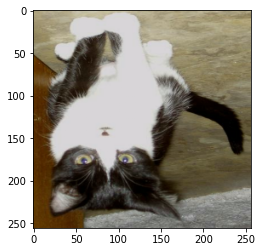

In [3]:
idx = 0

for x, y in tra_dataset.take(1):
    images = x.numpy()
    labels = y.numpy()

a = images[idx,::]
# a = tf.cast(images[0,::], tf.uint8)
print(np.max(a))
print(np.min(a))

print(labels[idx])

plt.imshow(a)
plt.show()

1.0


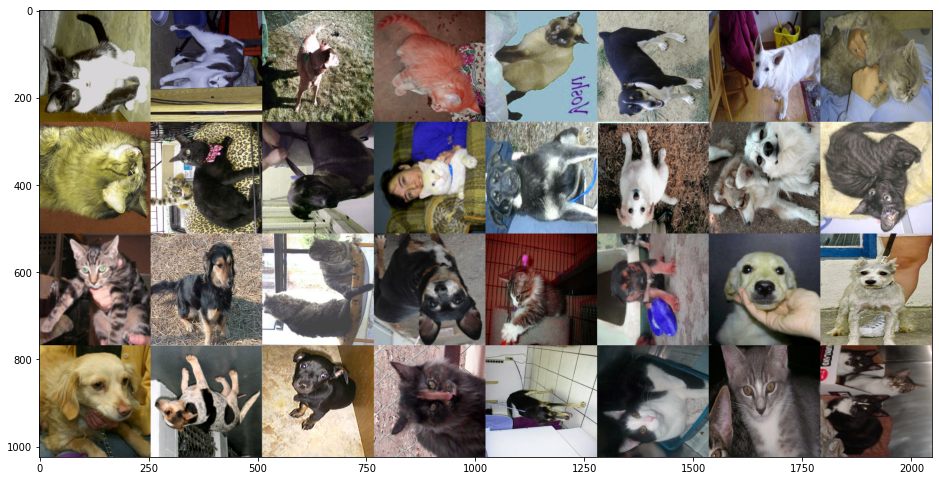

In [4]:
for x, y in tra_dataset.take(1):
    images = x.numpy()
    labels = y.numpy()
    print(np.max(images))
    # print(labels)

a = np.zeros((256*4,256*8,3))
for i in range(4):
    for j in range(8):
        a[i*256:(i+1)*256,j*256:(j+1)*256] = images[i*8+j,::]

plt.figure(figsize=(16,16))
plt.imshow(a)
plt.show()

(256, 256, 3)
<dtype: 'float32'>
0.8666667
0.40392157


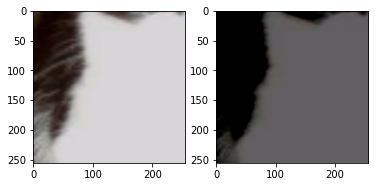

In [17]:
x = tf.io.read_file(tra_dataset.file_paths[0])
x = tf.image.decode_image(x)
x = tf.cast(tf.image.resize(x, (256,256)), tf.uint8)

x = tf.image.random_crop(x, (64,64,3))
x = tf.cast(tf.image.resize(x, (256,256)), tf.uint8)

seed = tf.random.uniform([2], 1, 10000, dtype=tf.int32)
xb = tf.image.stateless_random_brightness(x, 0.5, seed)

x /= 255
xb /= 255

print(x.shape)
print(x.dtype)
print(np.max(x))
print(np.max(xb))

plt.subplot(121)
plt.imshow(x)
plt.subplot(122)
plt.imshow(xb)
plt.show()

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    './datasets/DogsVsCats/train',
    image_size=(227,227),
    batch_size=50,
    label_mode="categorical",
    validation_split=0.2,
    subset="training",
    seed=10
)
train_file_paths = train_dataset.file_paths
print(train_file_paths[0])
train_dataset = train_dataset.map(lambda x, y: (x/255., y))

In [ ]:
for x, y in train_dataset.take(1):
    images = x.numpy()
    labels = y.numpy()

a = images[0,::]
# a = tf.cast(images[0,::], tf.uint8)
print(np.max(a))
print(np.min(a))

print(labels[0])

plt.imshow(a)
plt.show()